___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 8</p><h1>

 # Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

### Causes of Outliers

- Data entries errors
- FirstMeasurement errors or instrument errors
- Sampling errors
- Data processing error
- Natural novelties in data

### Guideline for Handling Outliers

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

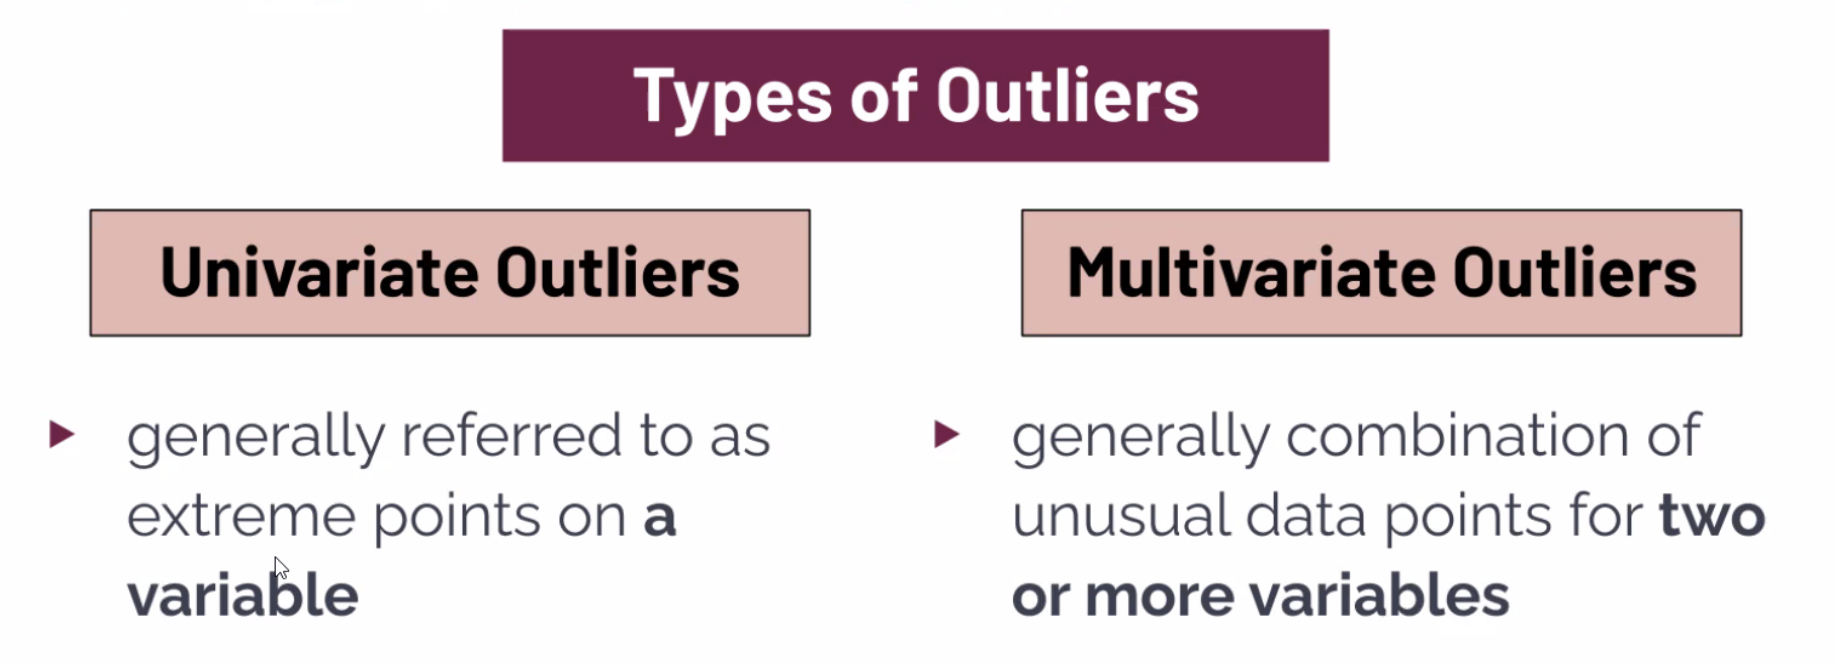

biz genel varsayim olarak multivariate olmadigini kabul ederiz 

## Catching and Detecting Outliers

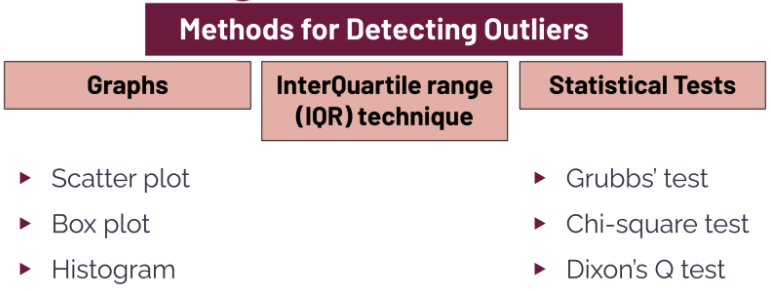

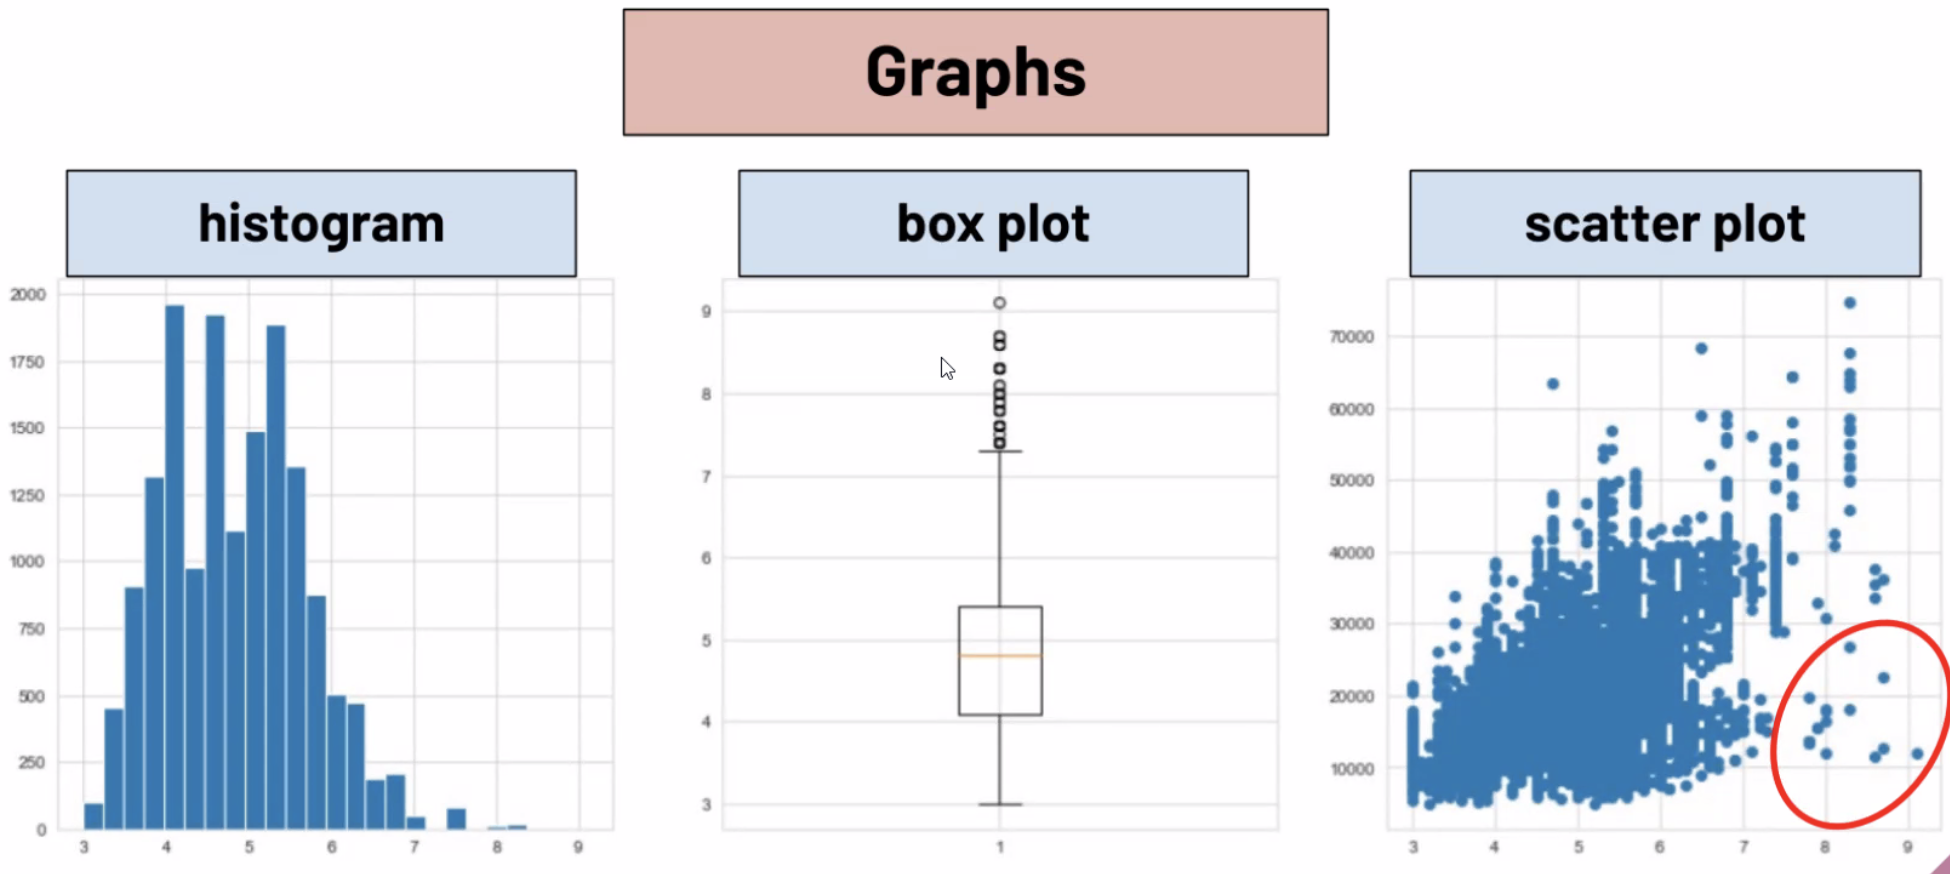

genelde boxplot, outlier olanlari daha iyi gosterir, 
- boxplotta outlier diye dahati atamazsiniz, yapilmamalidir. 
- outlier'a bakip datayi yorumlamak icin yontemdir

scater plotta gormek cok daha zor 

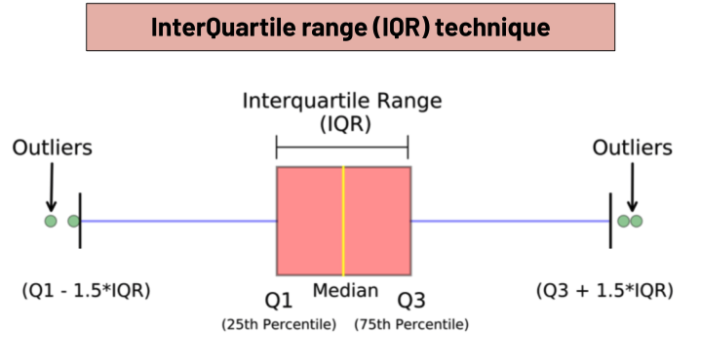

gercek hayatta: machine learningte outlier datayi uygulamaya sokarak testler yapilacak, bu testlerde alinan skorlar yapilan isin dogru olup olmadigini gosterecek. 

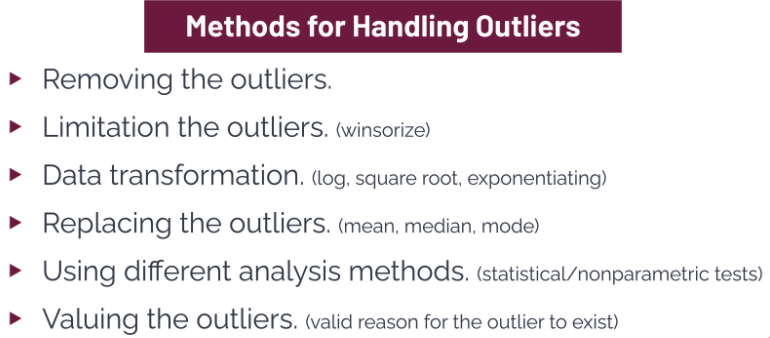

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names() #seaborn icinde yer alan dataset listesi

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


**info about "Diamond" dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

<AxesSubplot:xlabel='table'>

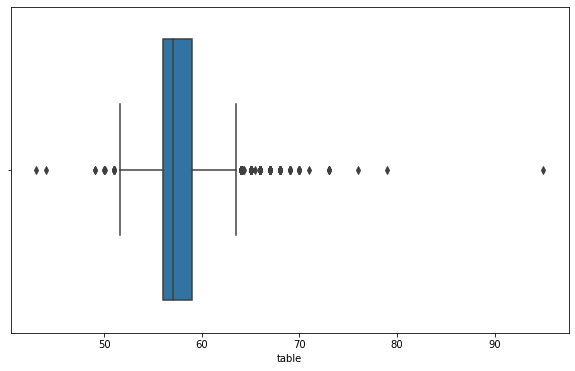

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df.table)

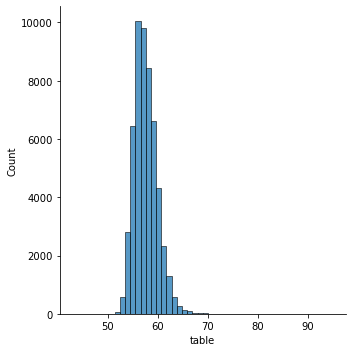

In [ ]:
sns.displot(df.table, bins = 50, kde = False) 

In [ ]:
df.table.sort_values() 
#hem ustten hem alttan ilk 5 degeri verir 

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [ ]:
df["table"].sort_values().tail() #son 5 deger

52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [ ]:
df["table"].sort_values().tail(10) # son 10 deger

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [ ]:
df.loc[df["table"].sort_values().tail(10)] 
#dataframe olarak gosterdi

,carat,depth,table,price,x,y,z
70.0,0.24,61.5,60.0,553,3.97,4.00,2.45
70.0,0.24,61.5,60.0,553,3.97,4.00,2.45
71.0,0.30,63.1,56.0,554,4.29,4.27,2.70
73.0,0.30,62.5,57.0,554,4.29,4.25,2.67
73.0,0.30,62.5,57.0,554,4.29,4.25,2.67
73.0,0.30,62.5,57.0,554,4.29,4.25,2.67
73.0,0.30,62.5,57.0,554,4.29,4.25,2.67
76.0,0.26,59.9,58.0,554,4.15,4.23,2.51
79.0,0.26,62.6,59.0,554,4.06,4.09,2.55
95.0,0.70,57.5,58.0,2759,5.85,5.90,3.38


In [ ]:
df.loc[df["table"].sort_values().tail(10).index]
# indexlere gore tabloyu tamamen gorebildik 

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


### Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

## Removing the Outliers

### First way

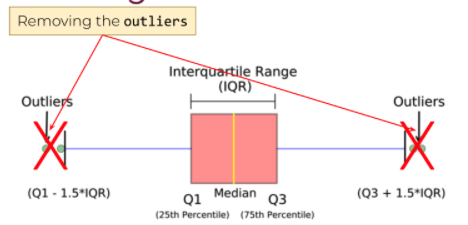

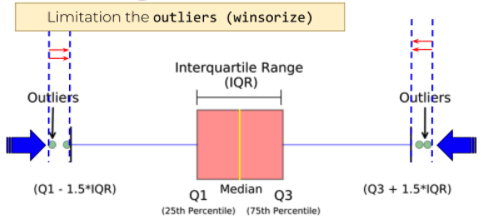

### Second way

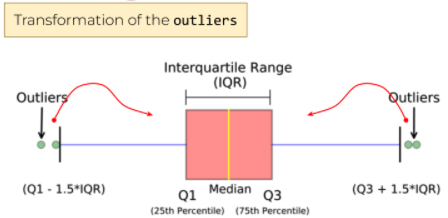

In [ ]:
# datanin logaritmasini alarak IQR icine dahil etmek

## Limitation and Transformation of the Outliers

### Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

### ``log()`` Transformation

The Numpy.log() method lets you calculate the mathematical log of any number or array.
The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

### removing after log transformation